## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

df.shape

(11251, 15)

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Drop unnecessary columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

# Check for missing values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Descriptive statistics of the dataset
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## EDA

### Gender

In [7]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


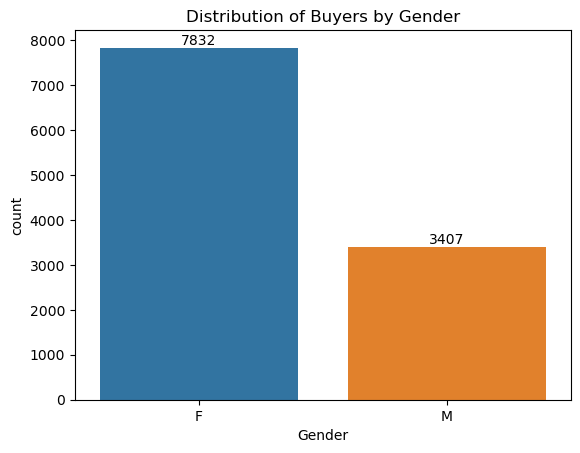

In [8]:
# Count plot of Gender

ax=sns.countplot(x=df.Gender)
for x in ax.containers:
    ax.bar_label(x)
plt.title('Distribution of Buyers by Gender')
plt.show()

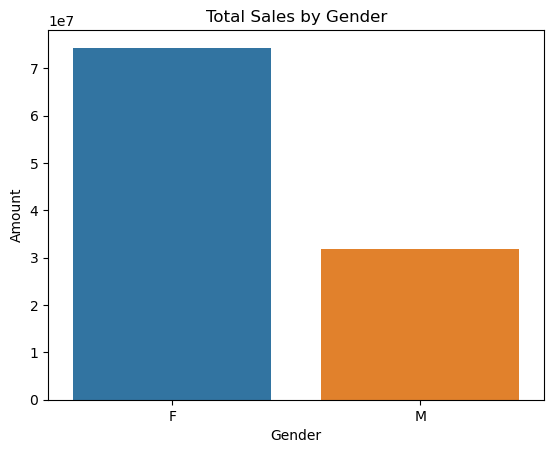

In [9]:
# Bar plot of total sales by Gender

sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sns.barplot(x=sales_gen.Gender,y=sales_gen.Amount)
plt.title('Total Sales by Gender')
plt.show()

**Interference:**  
Majority of buyers are female, with more than twice the number of male buyers.   
Also, females tend to spend significantly more than males.

### Age Group

In [10]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


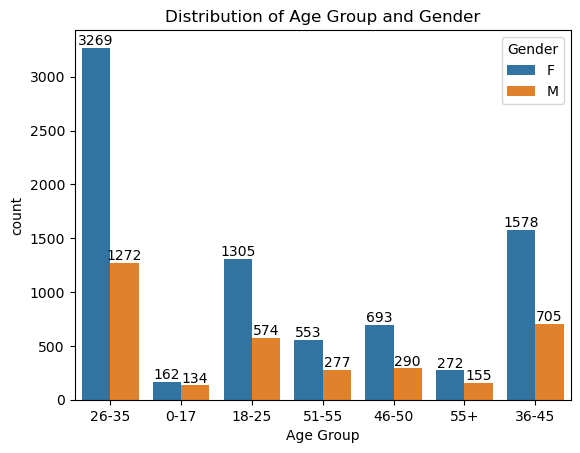

In [11]:
# Count plot of Age Group with Gender as hue

ax1=sns.countplot(x=df['Age Group'],hue=df.Gender)
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Distribution of Age Group and Gender')
plt.show()

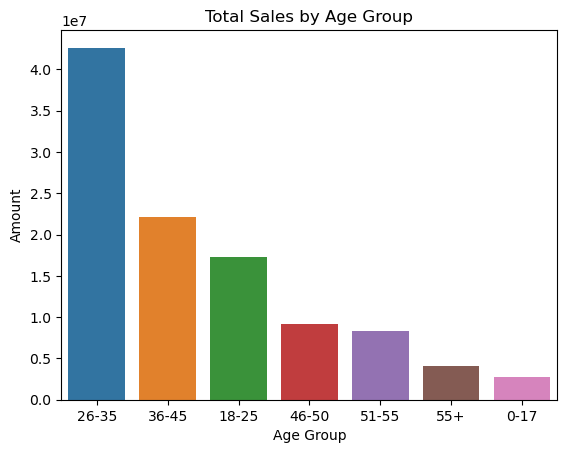

In [12]:
# Bar plot of total sales by Age Group

sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x=sales_age['Age Group'],y=sales_age.Amount)
plt.title('Total Sales by Age Group')
plt.show()

**Interference:**  
Majority of buyers are females under age group 26-35.

### State

In [13]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


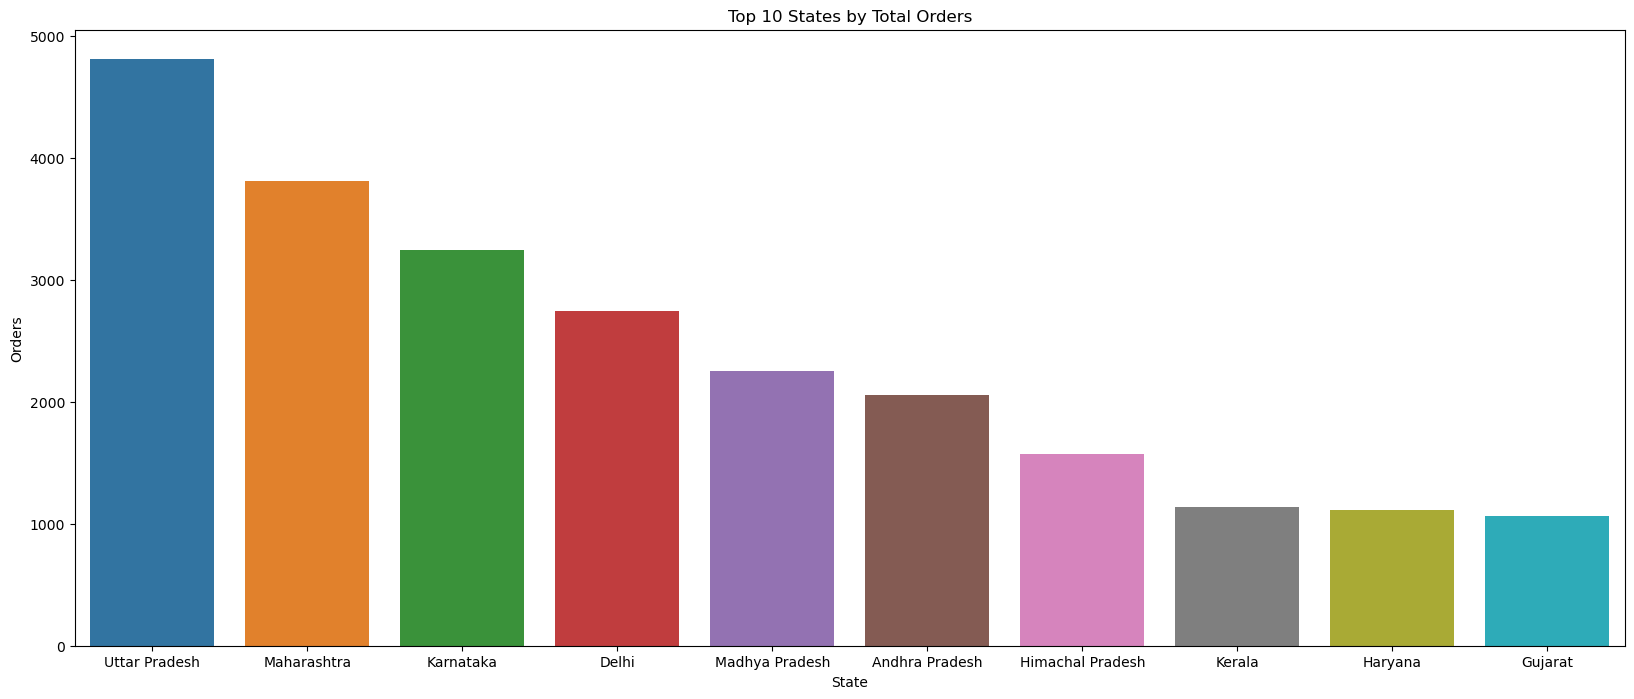

In [14]:
# Bar plot of total orders by State

order_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(x=order_state.State,y=order_state.Orders)
plt.title('Top 10 States by Total Orders')
plt.show()

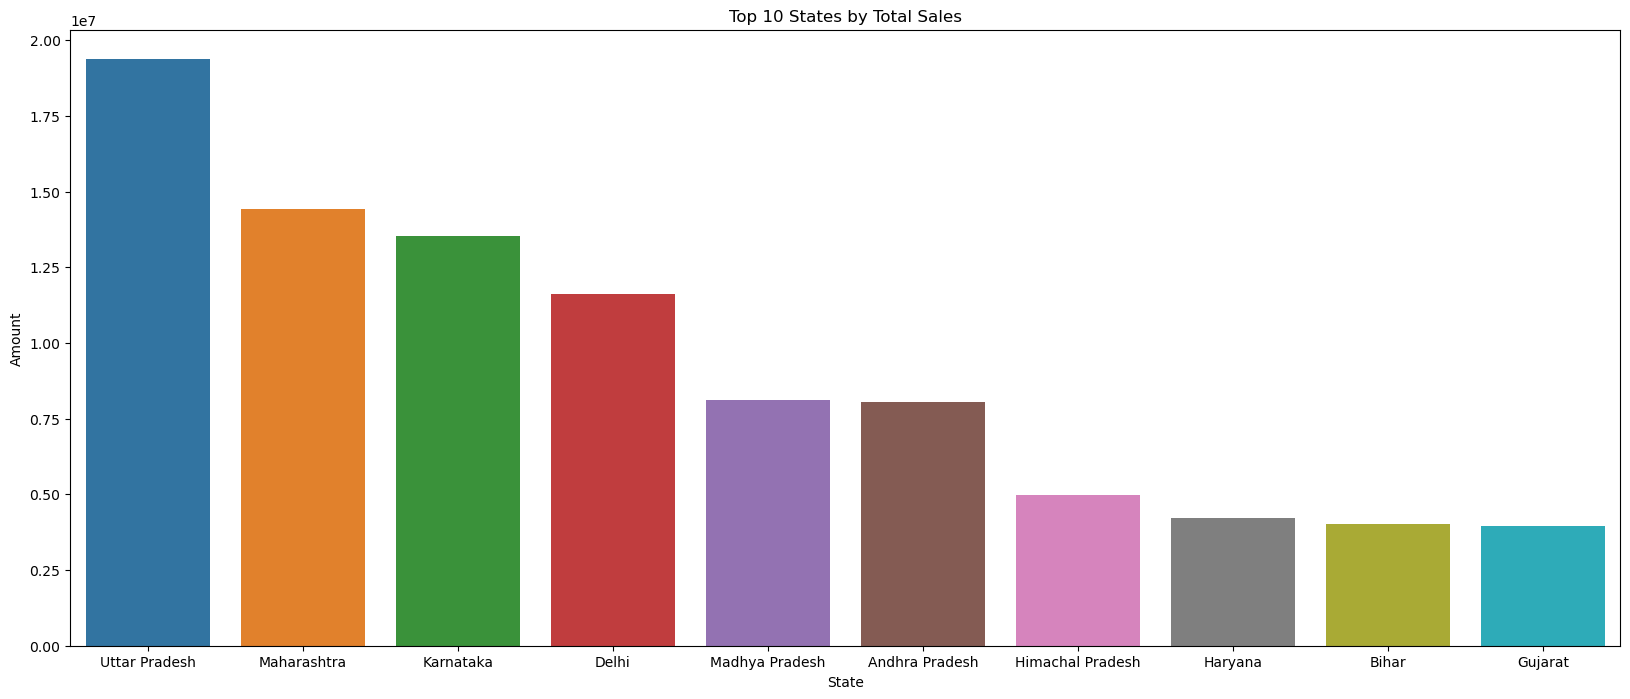

In [15]:
# Bar plot of total sales by State

amount_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(x=amount_state.State,y=amount_state.Amount)
plt.title('Top 10 States by Total Sales')
plt.show()

**Interference:**  
Most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra & Karnataka.

### Marital Status

In [16]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


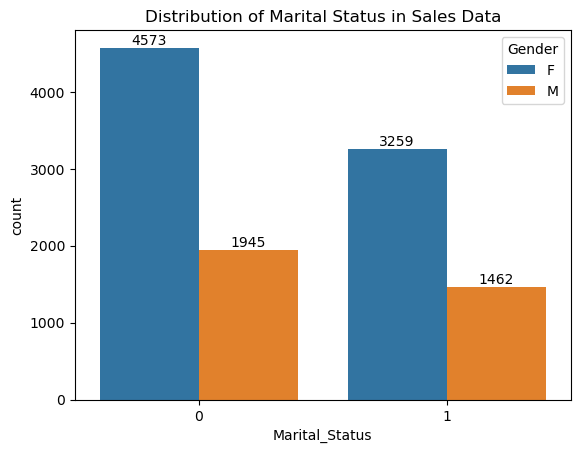

In [17]:
# Count plot of Marital Status with Gender as hue

ax1=sns.countplot(x=df['Marital_Status'],hue=df.Gender)
ax1.set_title('Distribution of Marital Status in Sales Data')
for container in ax1.containers:
    ax1.bar_label(container)

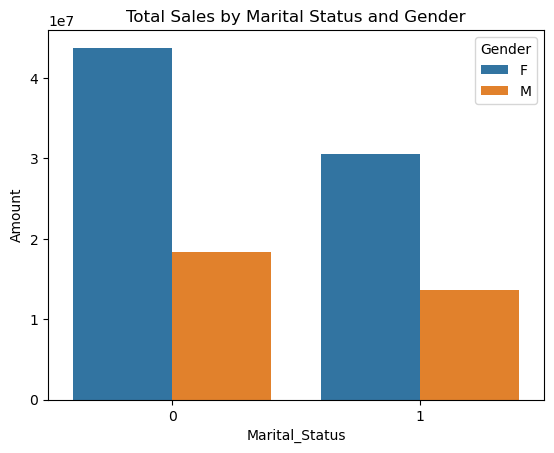

In [18]:
# Bar plot of total sales by Marital Status and Gender

sales_marital=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_marital,x='Marital_Status',y='Amount',hue='Gender')
plt.title('Total Sales by Marital Status and Gender')
plt.show()

**Interference:**  
Most of the buyers are unmarried woman with high purchasing power.

### Occupation

In [19]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


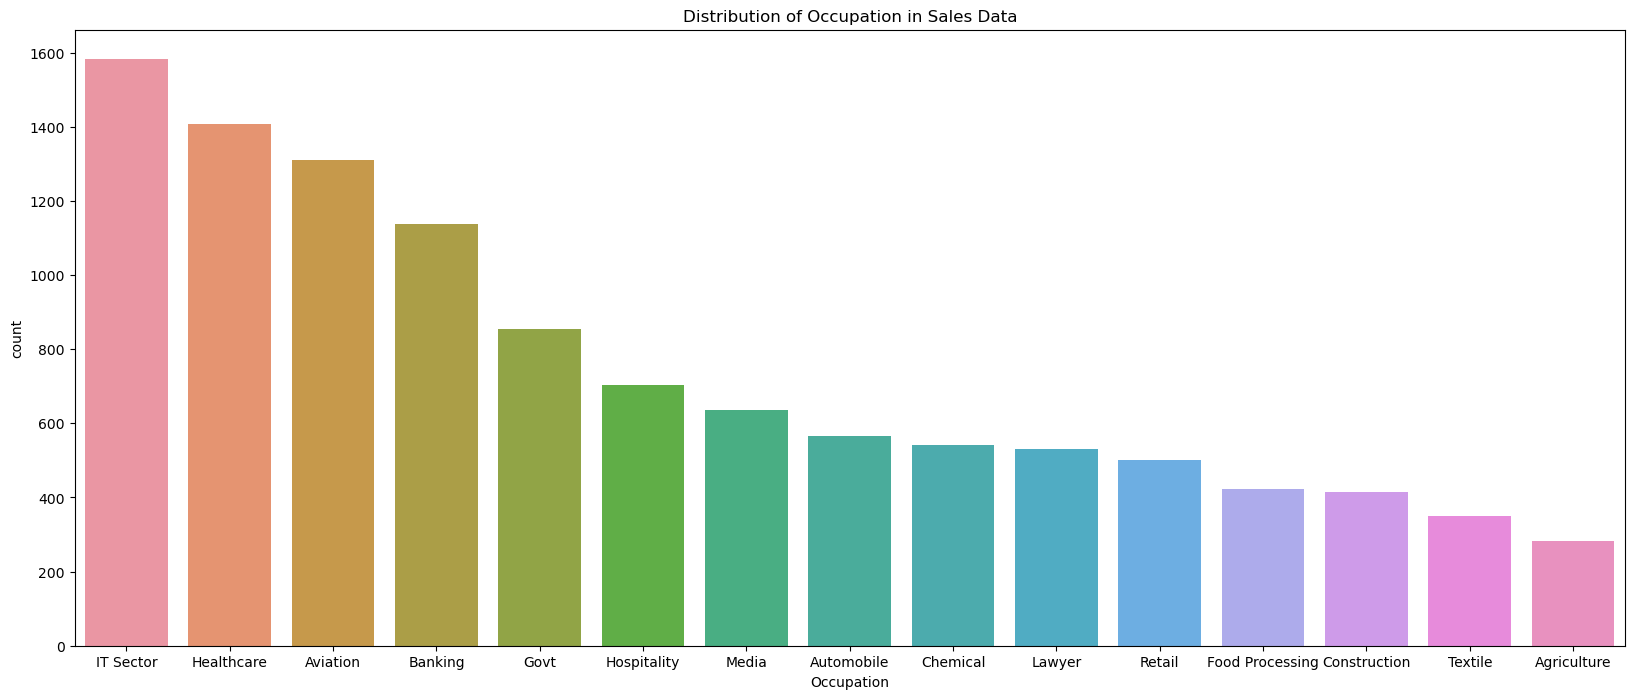

In [20]:
# Count plot of Occupation

plt.figure(figsize=(20,8))
sns.countplot(x=df.Occupation,order=df['Occupation'].value_counts().index)
plt.title('Distribution of Occupation in Sales Data')
plt.show()

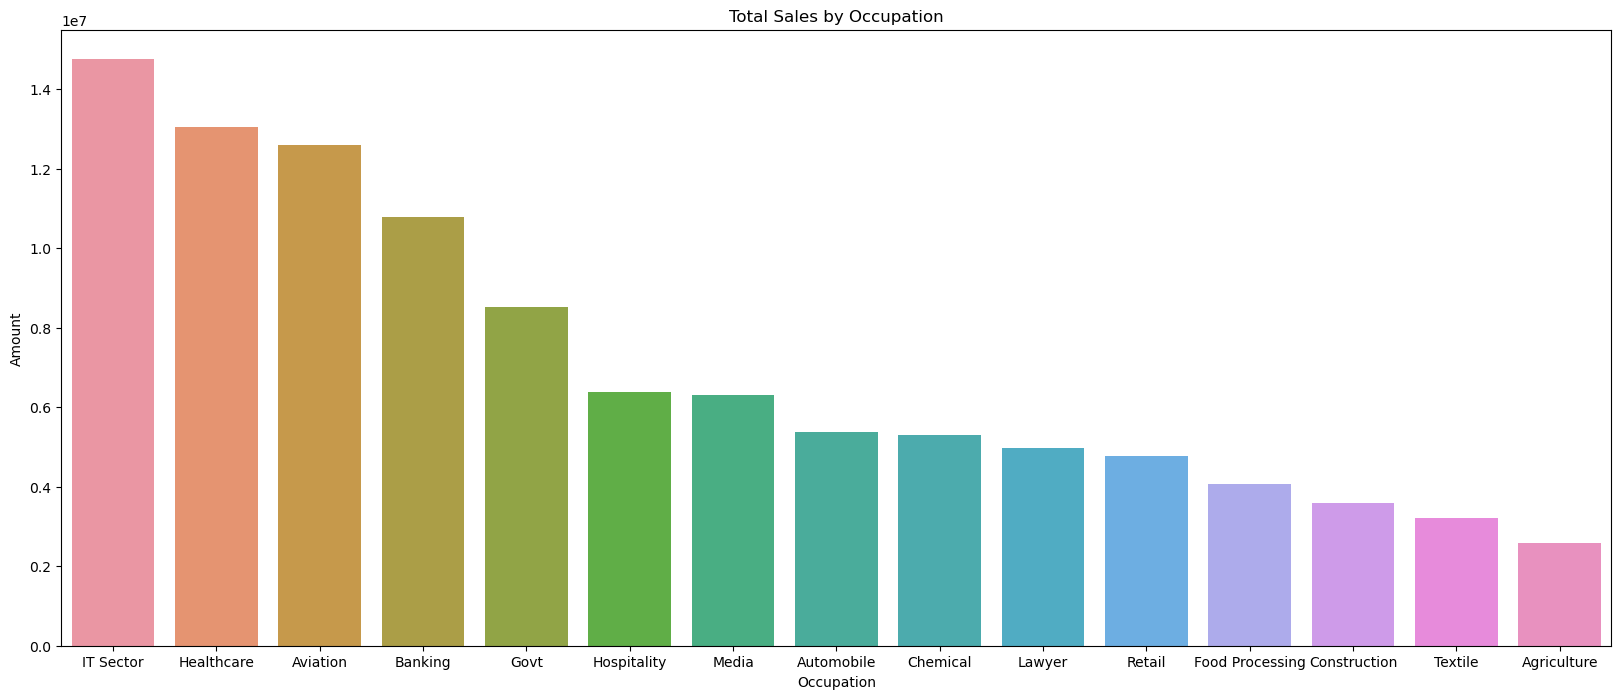

In [21]:
# Bar plot of total sales by Occupation

sales_occ=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data=sales_occ,x='Occupation',y='Amount')
plt.title('Total Sales by Occupation')
plt.show()

**Interference:**  
Most of the buyers are from IT, HealthCare & Aviation sector.

### Category

In [22]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


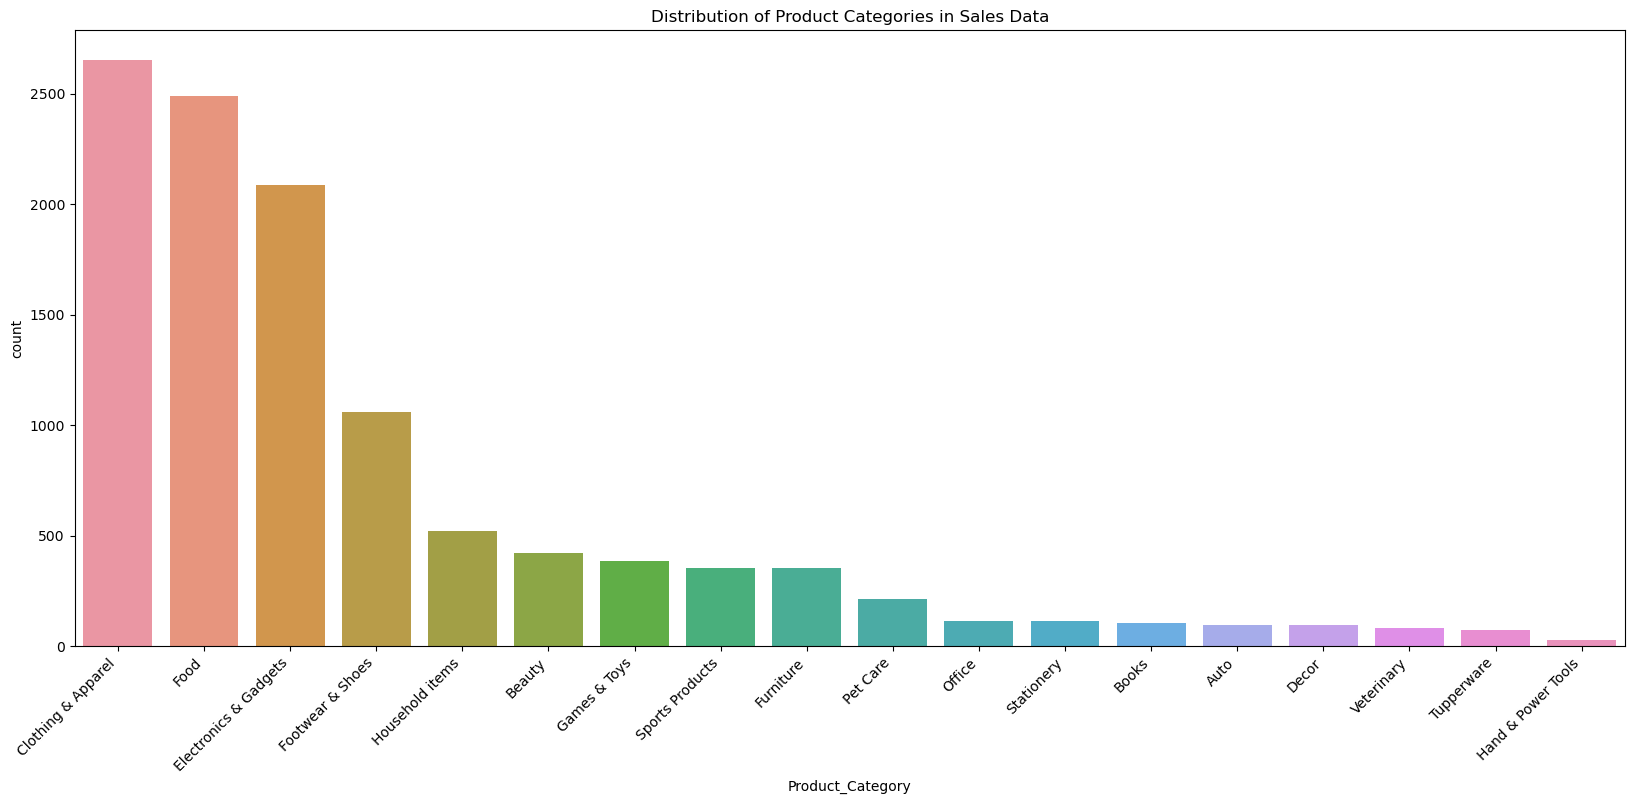

In [23]:
# Count plot of Product Category

plt.figure(figsize=(20, 8))
sns.countplot(x='Product_Category', data=df, order=df['Product_Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Categories in Sales Data')
plt.show()

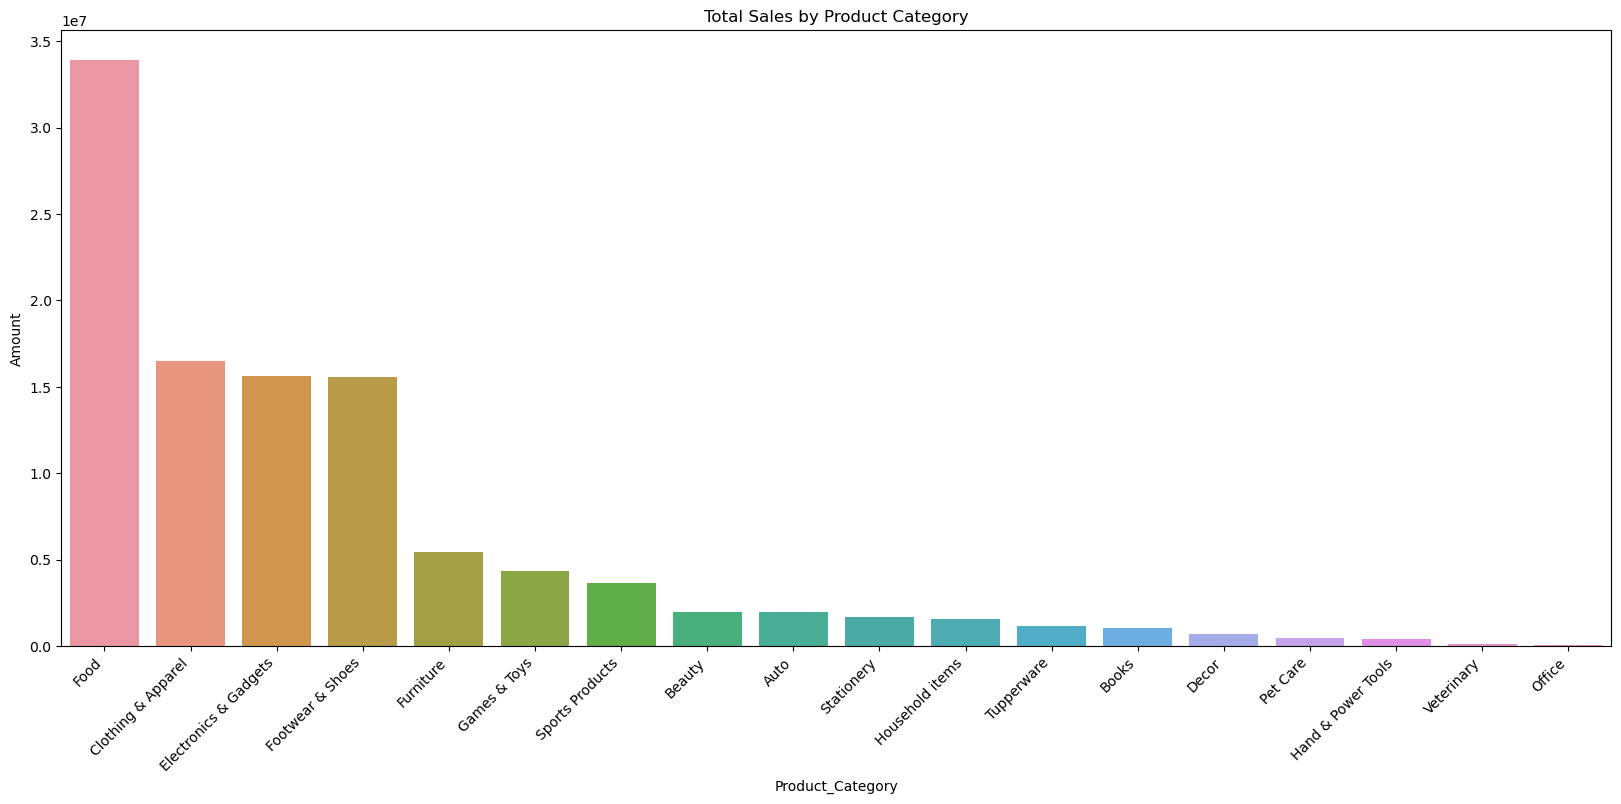

In [24]:
# Bar plot of total sales by Product Category

sales_cat=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(data=sales_cat,x='Product_Category',y='Amount')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Product Category')
plt.show()

**Interference:**  
Most sold products are from Food, Clothing & Electronics category.

### Product ID

In [25]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


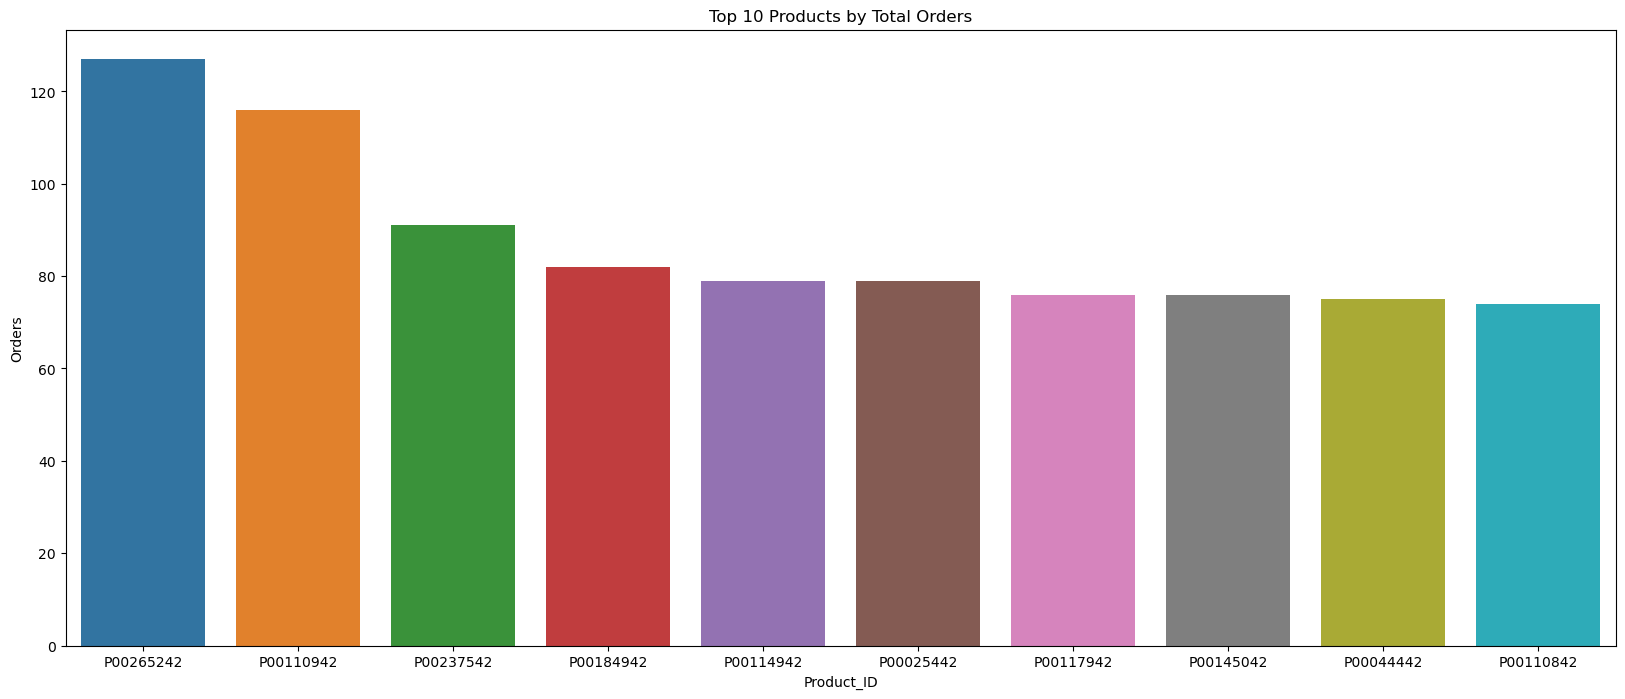

In [26]:
# Bar plot of total orders by Product ID

product_sales=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,8))
sns.barplot(x=product_sales.Product_ID,y=product_sales.Orders)
plt.title('Top 10 Products by Total Orders')
plt.show()

## Conclusion

**Unmarried woman**   
in **age group 26-35**   
from **UP, Maharashtra & Karnataka**   
working in **IT, HealthCare & Aviation**   
are more likely to buy products   
from **Food, Clothing & Electronics category**.

## Authors

[Alok Ranjan](https://www.linkedin.com/in/alokranjan-in/)